# Introduction to Pyro

![logo](pyro_plots.png)

Michael Zingale
Stony Brook University

## Why pyro?

  * Python is a good introductory language&mdash;it helps make the way these algorithms work clearer

  * High level introduction to core hydro algorithms for students
  
    * Supplemented with extensive notes deriving the methods ( https://github.com/Open-Astrophysics-Bookshelf/numerical_exercises)
    
  * Enables easy ability to rapidly prototype code&mdash;core intrastructure is in place
  
  * Allows for sharing exploration in Jupyter notebooks

## Design ideas:

  * Single driver implements core evolution
  
  * Clarity is emphasized over performance
  
  * Object-oriented structure: each solver provides a simulation class to manage the different parts of the update
  
  * All solvers are 2-d: right balance of complexity and usefulness
  
  * Realtime visualization when run in commandline mode

## History:

  * First version in 2003: python + Numeric + C extensions
  
  * May 2004: switch to python + numarray + C extensions
  
    cvs commit:
  
    > convert from Numeric to numarray, since numarray seems to be the future.
        
  * May 2012: revived, rewritten in python + NumPy + f2py
  
  * Nov 2018: python + NumPy + Numba

## Current Solvers

  * linear advection (2nd and 4th order FV, WENO; CTU, RK, and SDC time integration)
  
  * compressible hydrodynamics (2nd order CTU PLM, 2nd order MOL RK, 4th order FV solver with RK or SDC integration)
  
  * shallow water hydrodynamics
  
  * multigrid
  
  * implicit thermal diffusion
  
  * incompressible hydrodynamics
  
  * low Mach number atmospheric hydrodynamics (pseudo-imcompressible method)
  
  * special relativistic compressible hydrodynamics

## Main driver:

* parse runtime parameters

* setup the grid (``initialize()`` function from the solver)

  * initialize the data for the desired problem (``init_data()`` function from the problem)

* do any necessary pre-evolution initialization (``preevolve()`` function from the solver)

* evolve while t < tmax and n < max_steps

  * fill boundary conditions (``fill_BC_all()`` method of the ``CellCenterData2d`` class)
  * get the timestep (``compute_timestep()`` calls the solver's ``method_compute_timestep()`` function from the solver)
  * evolve for a single timestep (``evolve()`` function from the solver)
  * t = t + dt
  * output (``write()`` method of the ``CellCenterData2d`` class)
  * visualization (``dovis()`` function from the solver)

* call the solver's ``finalize()`` function to output any useful information at the end

<div class="alert alert-block alert-info">
&nbsp;This driver is flexible enough for all of the time-dependent solvers
</div>

## Example: advection

In [1]:
from pyro import Pyro
pyro_sim = Pyro("advection")
pyro_sim.initialize_problem("tophat", "inputs.tophat",
                            other_commands=["mesh.nx=8", "mesh.ny=8",
                                            "vis.dovis=0"])
pyro_sim.run_sim()

pyro ...
initializing the tophat advection problem...
    1    0.10000    0.10000
outputting...
    2    0.20000    0.10000
outputting...
    3    0.30000    0.10000
outputting...
    4    0.40000    0.10000
outputting...
    5    0.50000    0.10000
outputting...
    6    0.60000    0.10000
    7    0.70000    0.10000
outputting...
    8    0.80000    0.10000
outputting...
    9    0.90000    0.10000
outputting...
   10    1.00000    0.10000
outputting...
   11    1.00000    0.00000
outputting...
outputting...
parameter vis.store_images never used
parameter particles.n_particles never used
parameter particles.particle_generator never used
main:  0.11043357849121094


## Example: advection

In [2]:
dens = pyro_sim.get_var("density")
dens.pretty_print(show_ghost=True, fmt="%6.2f")

  0.48  0.16  0.01 -0.00 -0.00  0.02  0.23  0.48  0.48  0.16  0.01 -0.00 -0.00  0.02  0.23  0.48 
  0.23  0.05  0.00 -0.00 -0.01 -0.02  0.09  0.23  0.23  0.05  0.00 -0.00 -0.01 -0.02  0.09  0.23 
  0.04  0.01  0.00  0.00 -0.01 -0.02 -0.02  0.02  0.04  0.01  0.00  0.00 -0.01 -0.02 -0.02  0.02 
  0.00  0.00  0.00  0.00  0.00 -0.01 -0.01 -0.00  0.00  0.00  0.00  0.00  0.00 -0.01 -0.01 -0.00 
  0.00  0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00  0.00  0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00 
  0.02  0.02  0.00 -0.00  0.00  0.00  0.00  0.01  0.02  0.02  0.00 -0.00  0.00  0.00  0.00  0.01 
  0.20  0.12  0.02  0.00  0.00  0.01  0.05  0.16  0.20  0.12  0.02  0.00  0.00  0.01  0.05  0.16 
  0.49  0.20  0.02  0.00  0.00  0.04  0.23  0.48  0.49  0.20  0.02  0.00  0.00  0.04  0.23  0.48 
  0.48  0.16  0.01 -0.00 -0.00  0.02  0.23  0.48  0.48  0.16  0.01 -0.00 -0.00  0.02  0.23  0.48 
  0.23  0.05  0.00 -0.00 -0.01 -0.02  0.09  0.23  0.23  0.05  0.00 -0.00 -0.01 -0.02  0.09  0.23 
  0.04  0.01  0.00  

## Example: advection

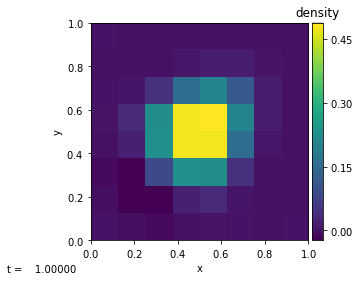

<Figure size 432x288 with 0 Axes>

In [3]:
pyro_sim.sim.dovis()

## Multigrid

![mg](mg_hg.gif)